In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BanditArm:
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  def pull(self):
    # normal distribution
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.m_estimate = ((self.N - 1) * self.m_estimate + x) / self.N

In [5]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j != true_best:
      count_suboptimal += 1
    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)
  print(f"print suboptimal for epsilon = {eps}", float(count_suboptimal) / N)

  return cumulative_average

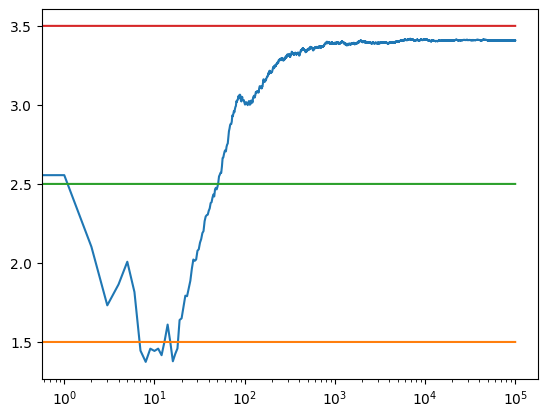

1.5213033208241613
2.5295426054813803
3.50760895794347
print suboptimal for epsilon = 0.1 0.06716


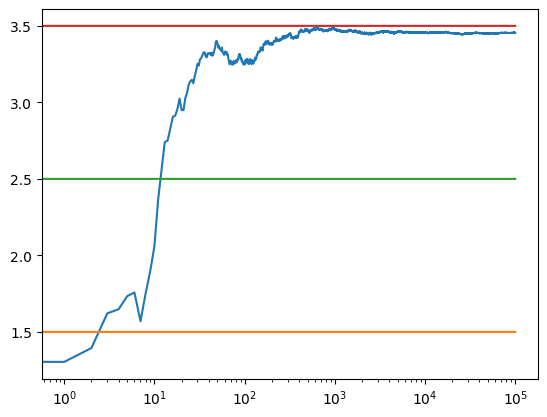

1.4848486614617538
2.5161448142137277
3.504926698758669
print suboptimal for epsilon = 0.05 0.03372


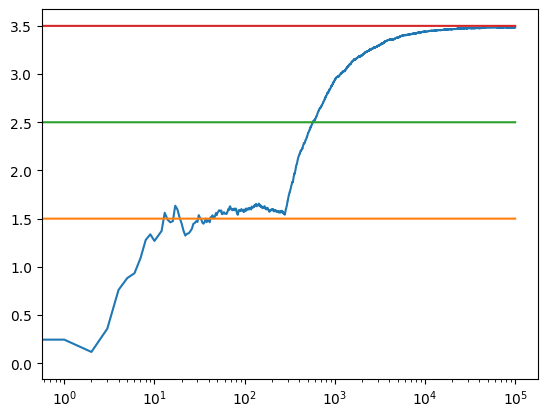

1.5037543941823357
2.5726459041197893
3.5000606702161923
print suboptimal for epsilon = 0.01 0.00964


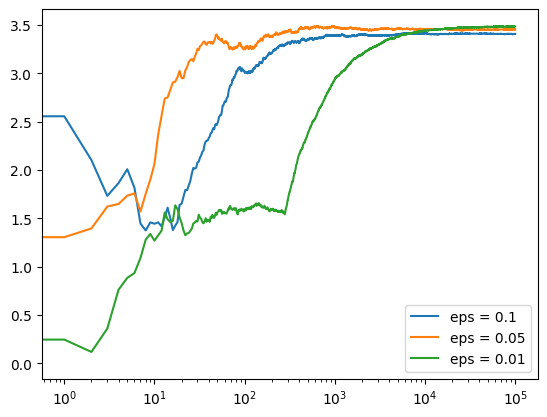

In [6]:
m1, m2, m3 = 1.5, 2.5, 3.5

c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

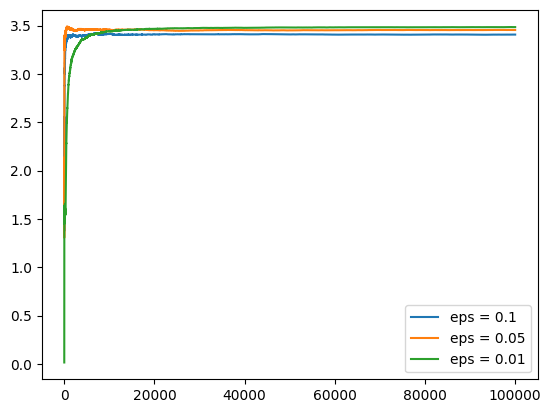

In [7]:
# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()